# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [80]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [81]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']
        city_lng = weather_json['coord']['lat']
        city_max_temp = weather_json['main']['temp_max']
        city_humidity = weather_json['main']['humidity']
        city_clouds = weather_json['clouds']['all']
        city_wind = weather_json['wind']['speed']
        city_country = weather_json['sys']['country']
        city_date = weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | mount pearl
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | diourbel
Processing Record 5 of Set 1 | daru
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | loreto
Processing Record 8 of Set 1 | mukalla
Processing Record 9 of Set 1 | constantia
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | praia da vitoria
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | argo
Processing Record 14 of Set 1 | polovinnoye
Processing Record 15 of Set 1 | aitape
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | port lincoln
Processing Record 19 of Set 1 | ola
Processing Record 20 of Set 1 | saipan
Processing Record 21 of Set 1 | margaret river
Processing Record 22 of Set 1 | uturoa
Processing Record 23 of Set 1

Processing Record 41 of Set 4 | tralee
Processing Record 42 of Set 4 | yekaterinoslavka
Processing Record 43 of Set 4 | ardestan
Processing Record 44 of Set 4 | isafjordur
Processing Record 45 of Set 4 | tindouf
Processing Record 46 of Set 4 | rabaul
Processing Record 47 of Set 4 | molochnoye
Processing Record 48 of Set 4 | borgarnes
Processing Record 49 of Set 4 | eureka
Processing Record 0 of Set 5 | checker hall
City not found. Skipping...
Processing Record 1 of Set 5 | whistler
Processing Record 2 of Set 5 | hithadhoo
Processing Record 3 of Set 5 | vilyuysk
Processing Record 4 of Set 5 | emporia
Processing Record 5 of Set 5 | loango
Processing Record 6 of Set 5 | laughlin
Processing Record 7 of Set 5 | tamanrasset
Processing Record 8 of Set 5 | longyearbyen
Processing Record 9 of Set 5 | verkhnevilyuysk
Processing Record 10 of Set 5 | vadso
Processing Record 11 of Set 5 | sinabang
Processing Record 12 of Set 5 | riachao das neves
Processing Record 13 of Set 5 | la ronge
Processing 

Processing Record 29 of Set 8 | nurota
Processing Record 30 of Set 8 | lospalos
Processing Record 31 of Set 8 | brownwood
Processing Record 32 of Set 8 | terra santa
Processing Record 33 of Set 8 | codrington
Processing Record 34 of Set 8 | south valley
Processing Record 35 of Set 8 | pak phanang
Processing Record 36 of Set 8 | coquimbo
Processing Record 37 of Set 8 | mumford
Processing Record 38 of Set 8 | madinat ash shamal
Processing Record 39 of Set 8 | bay roberts
Processing Record 40 of Set 8 | olonkinbyen
Processing Record 41 of Set 8 | yuzhno-kurilsk
Processing Record 42 of Set 8 | muisne
Processing Record 43 of Set 8 | tofol
Processing Record 44 of Set 8 | queenstown
Processing Record 45 of Set 8 | thunder bay
Processing Record 46 of Set 8 | sungjibaegam
Processing Record 47 of Set 8 | jumla
Processing Record 48 of Set 8 | colonia menno
Processing Record 49 of Set 8 | butajira
Processing Record 0 of Set 9 | laguna
Processing Record 1 of Set 9 | itoman
Processing Record 2 of Se

Processing Record 15 of Set 12 | mahanje
Processing Record 16 of Set 12 | ketchikan
Processing Record 17 of Set 12 | nadi
Processing Record 18 of Set 12 | sen monorom
Processing Record 19 of Set 12 | szczecinek
Processing Record 20 of Set 12 | ust'-ordynskiy
Processing Record 21 of Set 12 | torghay
Processing Record 22 of Set 12 | zagora
Processing Record 23 of Set 12 | barentu
Processing Record 24 of Set 12 | valentin gomez farias
Processing Record 25 of Set 12 | espargos
City not found. Skipping...
Processing Record 26 of Set 12 | khamis mushait
Processing Record 27 of Set 12 | sampit
Processing Record 28 of Set 12 | al jabin
Processing Record 29 of Set 12 | zaozersk
Processing Record 30 of Set 12 | sakaraha
Processing Record 31 of Set 12 | kabompo
-----------------------------
Data Retrieval Complete      
-----------------------------


In [82]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [83]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,64.7500,23.50,74,0,8.95,RU,1683165239
1,mount pearl,47.5166,47.5166,39.15,97,100,9.22,CA,1683165239
2,ilulissat,69.2167,69.2167,33.82,93,100,1.14,GL,1683165240
3,diourbel,14.6628,14.6628,73.81,66,57,7.90,SN,1683165240
4,daru,-9.0763,-9.0763,84.99,72,58,10.45,PG,1683165240


In [84]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [85]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,64.7500,23.50,74,0,8.95,RU,1683165239
1,mount pearl,47.5166,47.5166,39.15,97,100,9.22,CA,1683165239
2,ilulissat,69.2167,69.2167,33.82,93,100,1.14,GL,1683165240
3,diourbel,14.6628,14.6628,73.81,66,57,7.90,SN,1683165240
4,daru,-9.0763,-9.0763,84.99,72,58,10.45,PG,1683165240


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

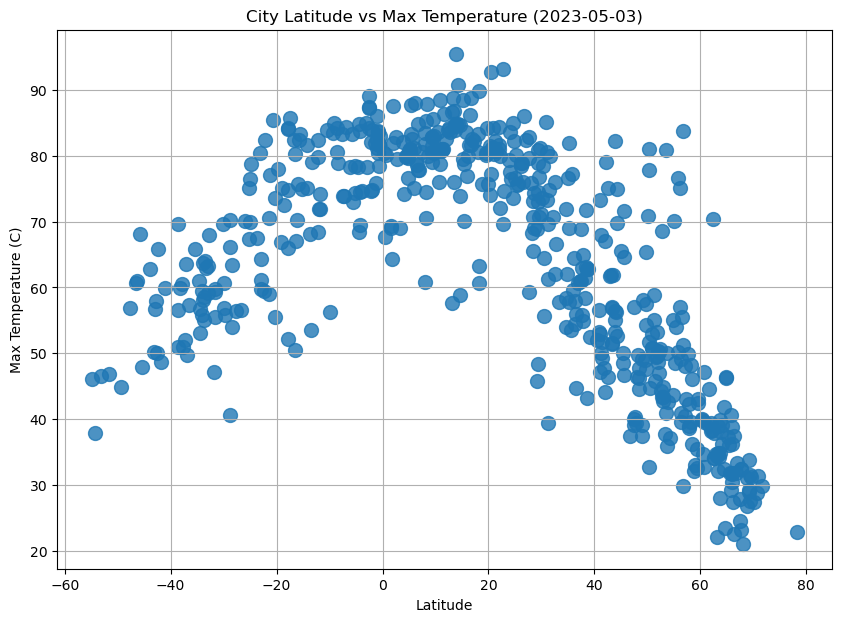

In [86]:
# Build scatter plot for latitude vs. temperature
today = pd.to_datetime('today').date()
lat = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
fig1, ax1 =plt.subplots(figsize=(10,7))
plt.scatter(lat, max_temp, s=100, marker = "o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature ({today})")
plt.xlabel('Latitude')   
plt.ylabel('Max Temperature (C)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

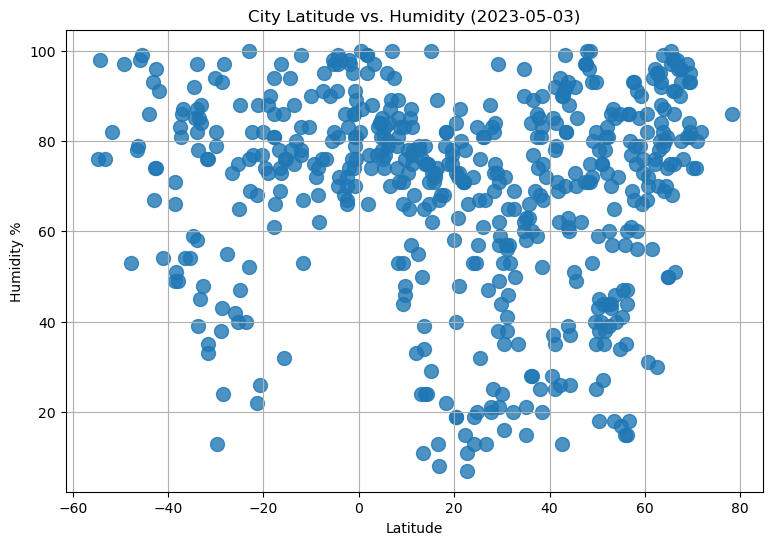

In [87]:
# Build the scatter plots for latitude vs. humidity
today = pd.to_datetime('today').date()
lat = city_data_df['Lat']
humidity = city_data_df['Humidity']
fig1, ax1 =plt.subplots(figsize=(9,6))
plt.scatter(lat, humidity, s=100, marker = "o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

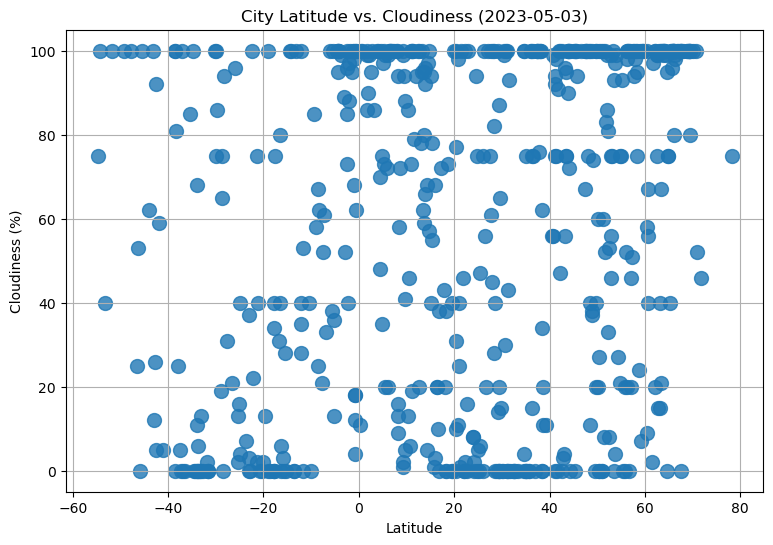

In [88]:
# Build the scatter plots for latitude vs. cloudiness
today = pd.to_datetime('today').date()
lat = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']
fig1, ax1 =plt.subplots(figsize=(9,6))
plt.scatter(lat, cloudiness, s=100, marker = "o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

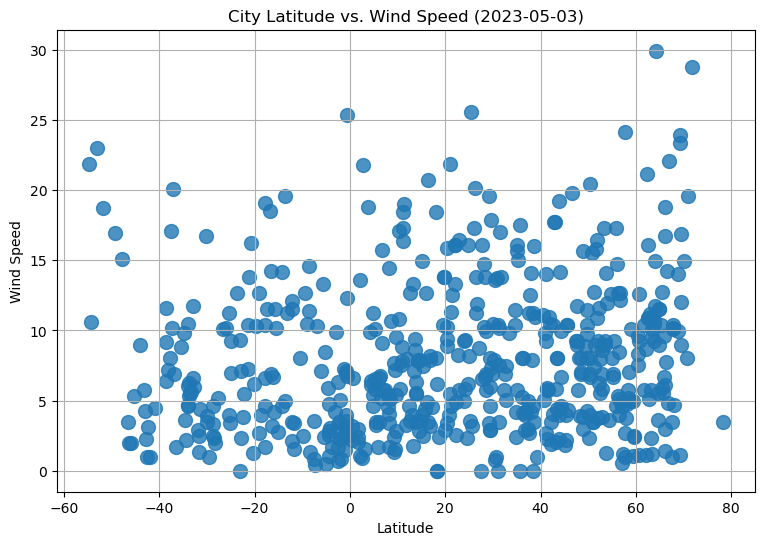

In [89]:
# Build the scatter plots for latitude vs. wind speed
today = pd.to_datetime('today').date()
lat = city_data_df['Lat']
wind = city_data_df['Wind Speed']
fig1, ax1 =plt.subplots(figsize=(9,6))
plt.scatter(lat, wind, s=100, marker = "o", alpha=0.8)
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [90]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #R-squared
    print(f"The r-squared is: {round(rvalue**2,3)}")
    
    #Scatterplots
    fig1, ax1 = plt.subplots(figsize=(9,6))
    plt.scatter(x_axis, y_axis, s=100, marker = "o", alpha=0.8)
    plt.plot(x_axis, regress_values, "r-")
    
    #
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} ({today})")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq, text_coordinates, color="r")

In [91]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,64.7500,23.50,74,0,8.95,RU,1683165239
1,mount pearl,47.5166,47.5166,39.15,97,100,9.22,CA,1683165239
2,ilulissat,69.2167,69.2167,33.82,93,100,1.14,GL,1683165240
3,diourbel,14.6628,14.6628,73.81,66,57,7.90,SN,1683165240
6,loreto,22.2667,22.2667,72.07,15,100,2.55,MX,1683165240


In [92]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,daru,-9.0763,-9.0763,84.99,72,58,10.45,PG,1683165240
5,adamstown,-25.0660,-25.0660,76.39,65,16,3.42,PN,1683165169
9,hermanus,-34.4187,-34.4187,56.80,85,0,2.17,ZA,1683165241
14,aitape,-3.1374,-3.1374,84.92,68,89,4.16,PG,1683165241
15,blackmans bay,-43.0167,-43.0167,56.73,67,12,4.27,AU,1683165241


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.746


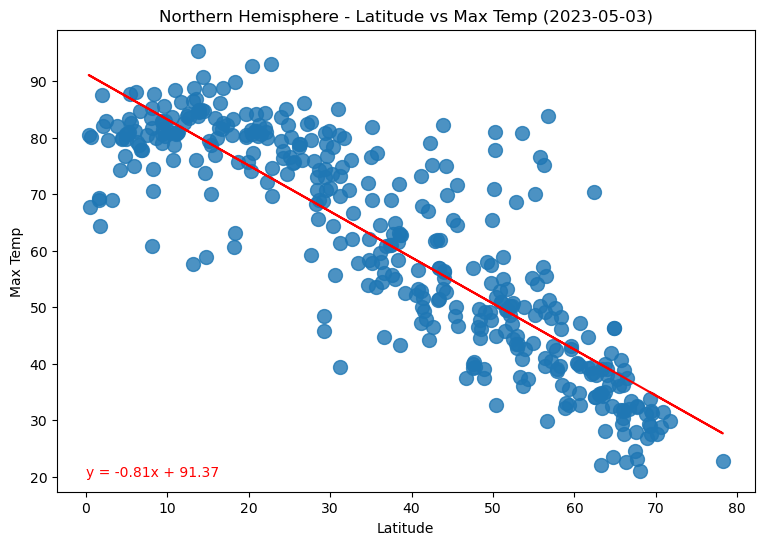

In [94]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Max Temp', 'Northern', (0,20))
plt.show()

The r-squared is: 0.626


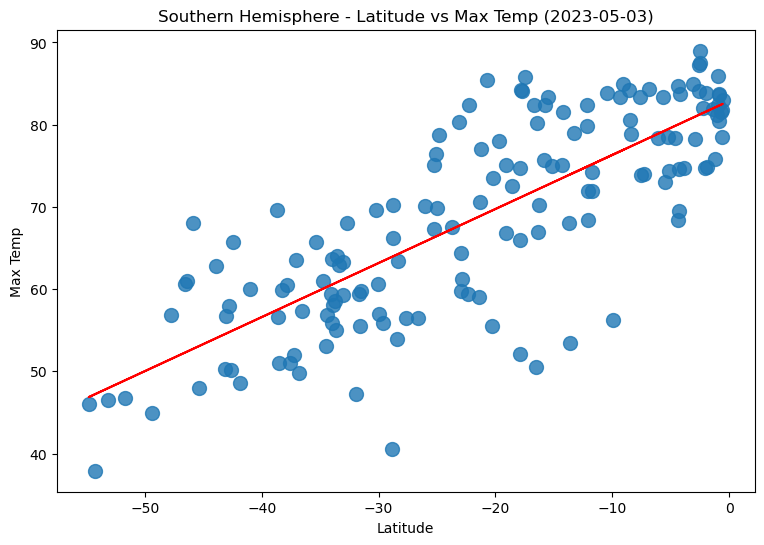

In [95]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Max Temp', 'Southern', (-50, 35))
plt.show()

**Discussion about the linear relationship:** The sample data from the Northern Hemisphere indicates there is a negative relationship between temperature and latitude, while the sample Data from the Southern Hemisphere indicates there is a slight positive relationship.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.009


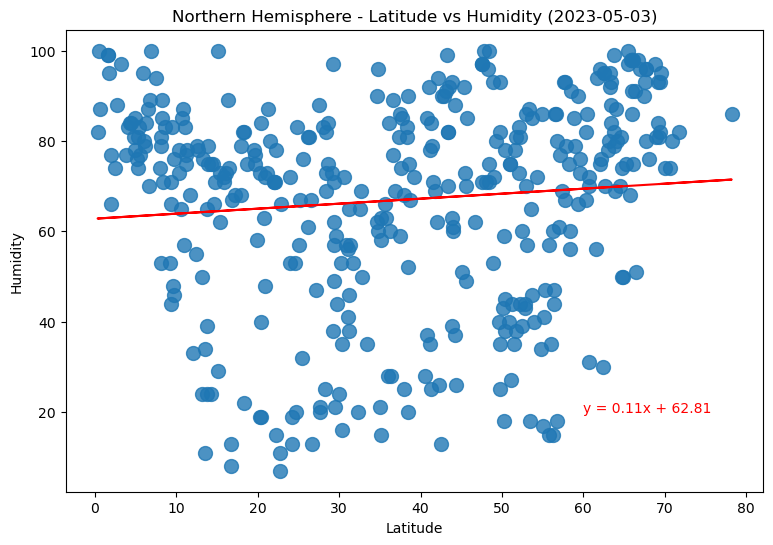

In [97]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Humidity', 'Northern', (60, 20))
plt.show()

The r-squared is: 0.027


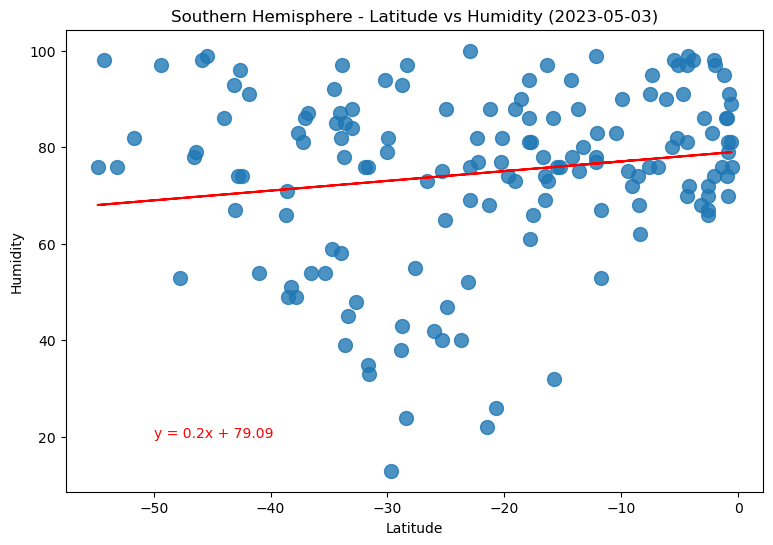

In [98]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Humidity', 'Southern', (-50, 20))
plt.show()

**Discussion about the linear relationship:** The sample data from the Northern and Southern Hemispheres indicate there is a slight positive relationship between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.02


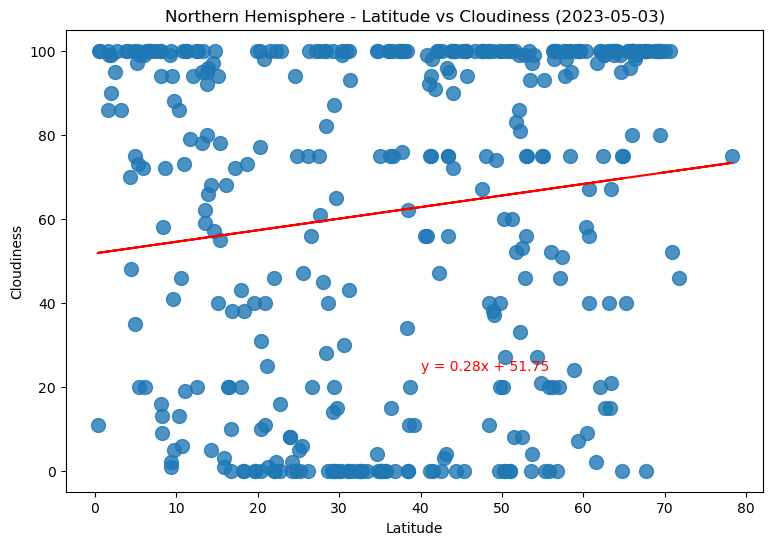

In [99]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Cloudiness', 'Northern', (40, 24))
plt.show()

The r-squared is: 0.034


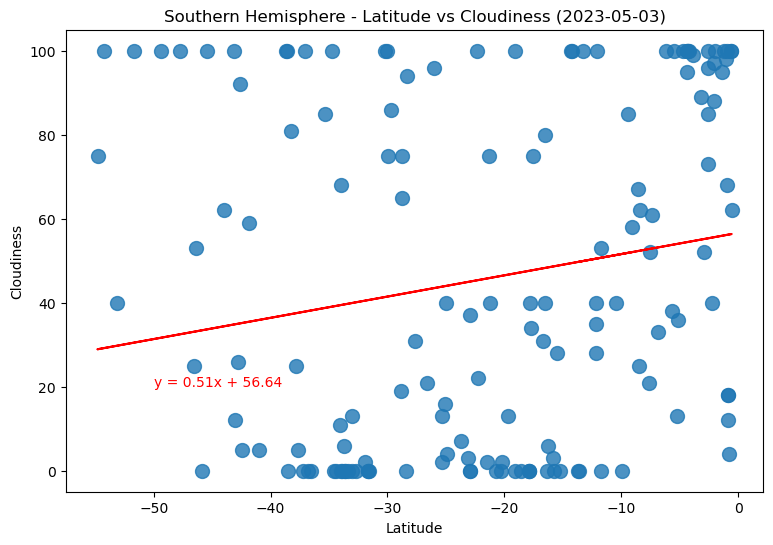

In [100]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Cloudiness', 'Southern', (-50, 20))
plt.show()

**Discussion about the linear relationship:** The sample data from the Northern and Southern Hemispheres indicate there is a slight positive (almost no) relationship between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.015


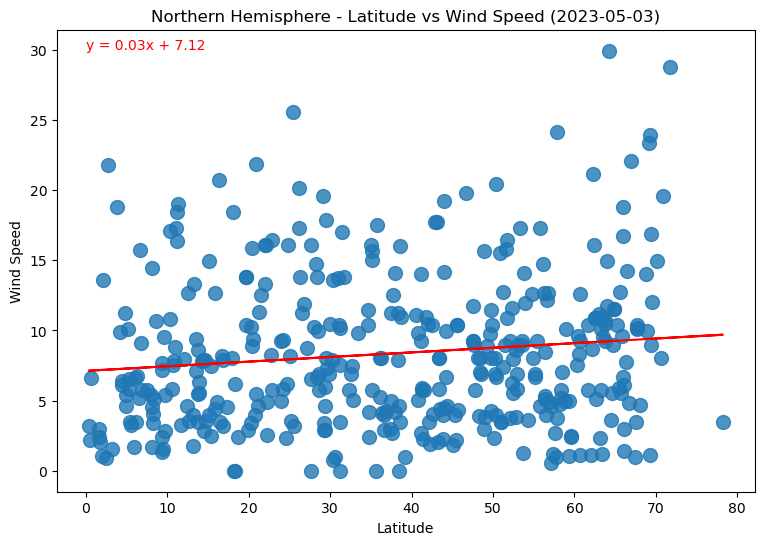

In [102]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Wind Speed', 'Northern', (0, 30))
plt.show()

The r-squared is: 0.032


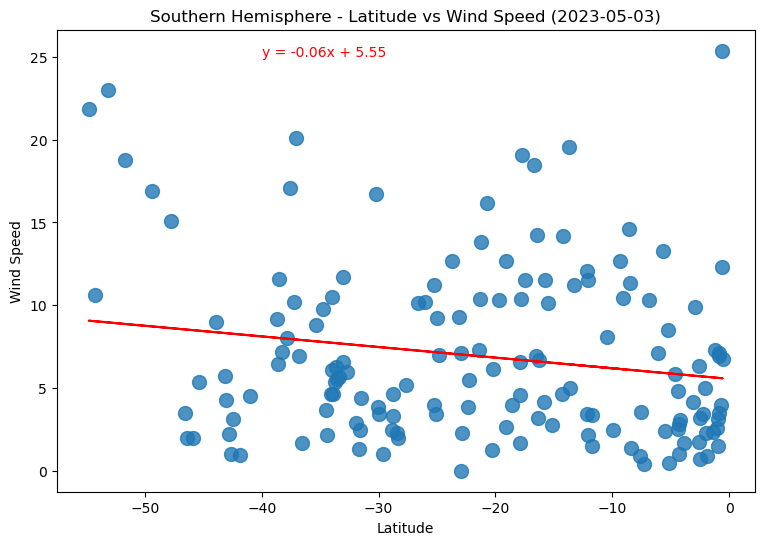

In [105]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
plot_linear_regression(x_axis, y_axis, 'Latitude', 'Wind Speed', 'Southern', (-40, 25))
plt.show()

**Discussion about the linear relationship:** The sample data from the Northern Hemisphere indicates there is a slight positive (almost no) relationship between temperature and windspeed, while the sample Data from the Southern Hemisphere indicates there is a slight negative (almost no) relationship.